# Índice de pasos


### 1. Importar librerías
### 2. Cargar y procosar imágenes
### 3. Crear etiquetas
### 4. Convertir a arrays y dividir en train/test
### 5. Escalar datos
### 6. Visualizar imágenes
### 7. Definir y entrenar el modelo CNN
### 8. Evaluar el modelo
### 9. Métricas y curvas ROC/PR
### 10. Visualización de resultados de entrenamiento
### 11. Matriz de confusión     
### 12. Visualizar predicciones
### 13. Interpretabilidad (LIME, saliency, etc.)
### 14. Interpretabilidad avanzada: LIME
### 15. Interpretabilidad: Sensibilidad a oclusión
### 16. Guardar y cargar el modelo

# Paso 1: Importar librerías

In [ ]:
import os  # Le dice a la computadora cómo buscar y organizar archivos y carpetas, como cuando buscas tus juguetes en tu cuarto.
import numpy as np  # Es como una caja de herramientas para hacer matemáticas rápidas y fáciles con muchos números, como sumar puntos en un juego.
import matplotlib.pyplot as plt  # Sirve para dibujar gráficos y mostrar imágenes, como cuando haces dibujos en una hoja.
from PIL import Image  # Permite abrir y cambiar imágenes, como cuando abres una foto en tu tablet y la recortas.
from sklearn.model_selection import train_test_split  # Ayuda a dividir tus datos en dos grupos: uno para aprender y otro para probar, como cuando estudias para un examen y luego te pones a prueba.
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc  # Son herramientas para ver qué tan bien aprendió la computadora, como cuando revisas tu boleta de calificaciones.
import tensorflow as tf  # Es una súper caja de herramientas para que la computadora aprenda a reconocer cosas en imágenes, sonidos, y más.
from tensorflow.keras.models import Sequential  # Permite construir el cerebro del robot paso a paso, como apilar bloques de LEGO uno tras otro.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Son diferentes tipos de bloques para construir el cerebro: unos ven detalles, otros resumen, otros deciden, y otros ayudan a no olvidar.
from tensorflow.keras.optimizers import Adam  # Es como un entrenador que le dice al robot cómo mejorar cada vez que se equivoca.

# Paso 2: Cargar y procesar imágenes

In [ ]:
# Define las rutas a las carpetas
normal_path = r"C:\Users\admin\Desktop\MACHINE LEARNING\Proyecto_9\Brain_Data_Organised\Normal(1551)"  # Aquí le decimos al robot dónde están las fotos de cerebros sanos, como si le diéramos la dirección de la casa de los cerebros sanos.
stroke_path = r"C:\Users\admin\Desktop\MACHINE LEARNING\Proyecto_9\Brain_Data_Organised\Stroke(950)"   # Y aquí le damos la dirección de la casa de los cerebros con problemas (stroke).

normal_folder = os.listdir(normal_path)  # El robot mira dentro de la casa de los cerebros sanos y hace una lista de todas las fotos que hay allí.
stroke_folder = os.listdir(stroke_path)  # Hace lo mismo en la casa de los cerebros con problemas.

data = []  # Aquí preparamos una caja vacía donde vamos a guardar todas las fotos que el robot va a mirar.

# Cargar imágenes normales
for img_file in normal_folder:  # El robot va a mirar una por una todas las fotos de cerebros sanos.
    img_path = os.path.join(normal_path, img_file)  # Busca la dirección exacta de cada foto.
    image = Image.open(img_path).resize((224,224)).convert('RGB')  # Abre la foto, la recorta para que todas tengan el mismo tamaño (como si todas las fotos fueran del mismo tamaño para un álbum) y se asegura de que tengan colores que el robot pueda entender.
    data.append(np.array(image))  # Guarda la foto en la caja para que el robot la use después.

# Cargar imágenes de stroke
for img_file in stroke_folder:  # Ahora el robot hace lo mismo con las fotos de cerebros con problemas.
    img_path = os.path.join(stroke_path, img_file)  # Busca la dirección exacta de cada foto.
    image = Image.open(img_path).resize((224,224)).convert('RGB')  # Abre la foto, la recorta y la prepara igual que antes.
    data.append(np.array(image))  # Guarda la foto en la caja junto con las otras.


# Paso 3: Crear etiquetas

In [ ]:
normal_label = [0]*len(normal_folder)  # El robot pone una calcomanía con el número 0 en cada foto de cerebro sano, para saber que son sanos.
stroke_label = [1]*len(stroke_folder)  # Ahora pone una calcomanía con el número 1 en cada foto de cerebro con problemas, para saber que son de stroke.
Target_label = normal_label + stroke_label  # Junta todas las calcomanías en una sola lista, así el robot sabe qué etiqueta le corresponde a cada foto.

# Paso 4: Convertir a arrays y dividir en train/test

In [ ]:
x = np.array(data)  # El robot pone todas las fotos en una gran caja ordenada, para que sea más fácil trabajar con ellas.
y = np.array(Target_label)  # Hace lo mismo con las etiquetas, así sabe cuál foto es sana y cuál es de stroke.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, shuffle=True, random_state=42)
# El robot divide las fotos y etiquetas en dos grupos: uno grande para aprender (entrenar) y uno pequeño para hacer un examen (probar).
# "test_size=0.10" significa que solo el 10% de las fotos se usan para el examen, y el 90% para aprender.
# "shuffle=True" mezcla las fotos como si barajara cartas, para que el robot no haga trampa aprendiendo solo de un tipo.
# "random_state=42" es como usar siempre la misma semilla mágica para que, si repites el experimento, salga igual.

# Paso 5: Escalar datos

In [5]:
x_train_s = x_train / 255.0
x_test_s = x_test / 255.0

# Paso 6: Visualizar imágenes

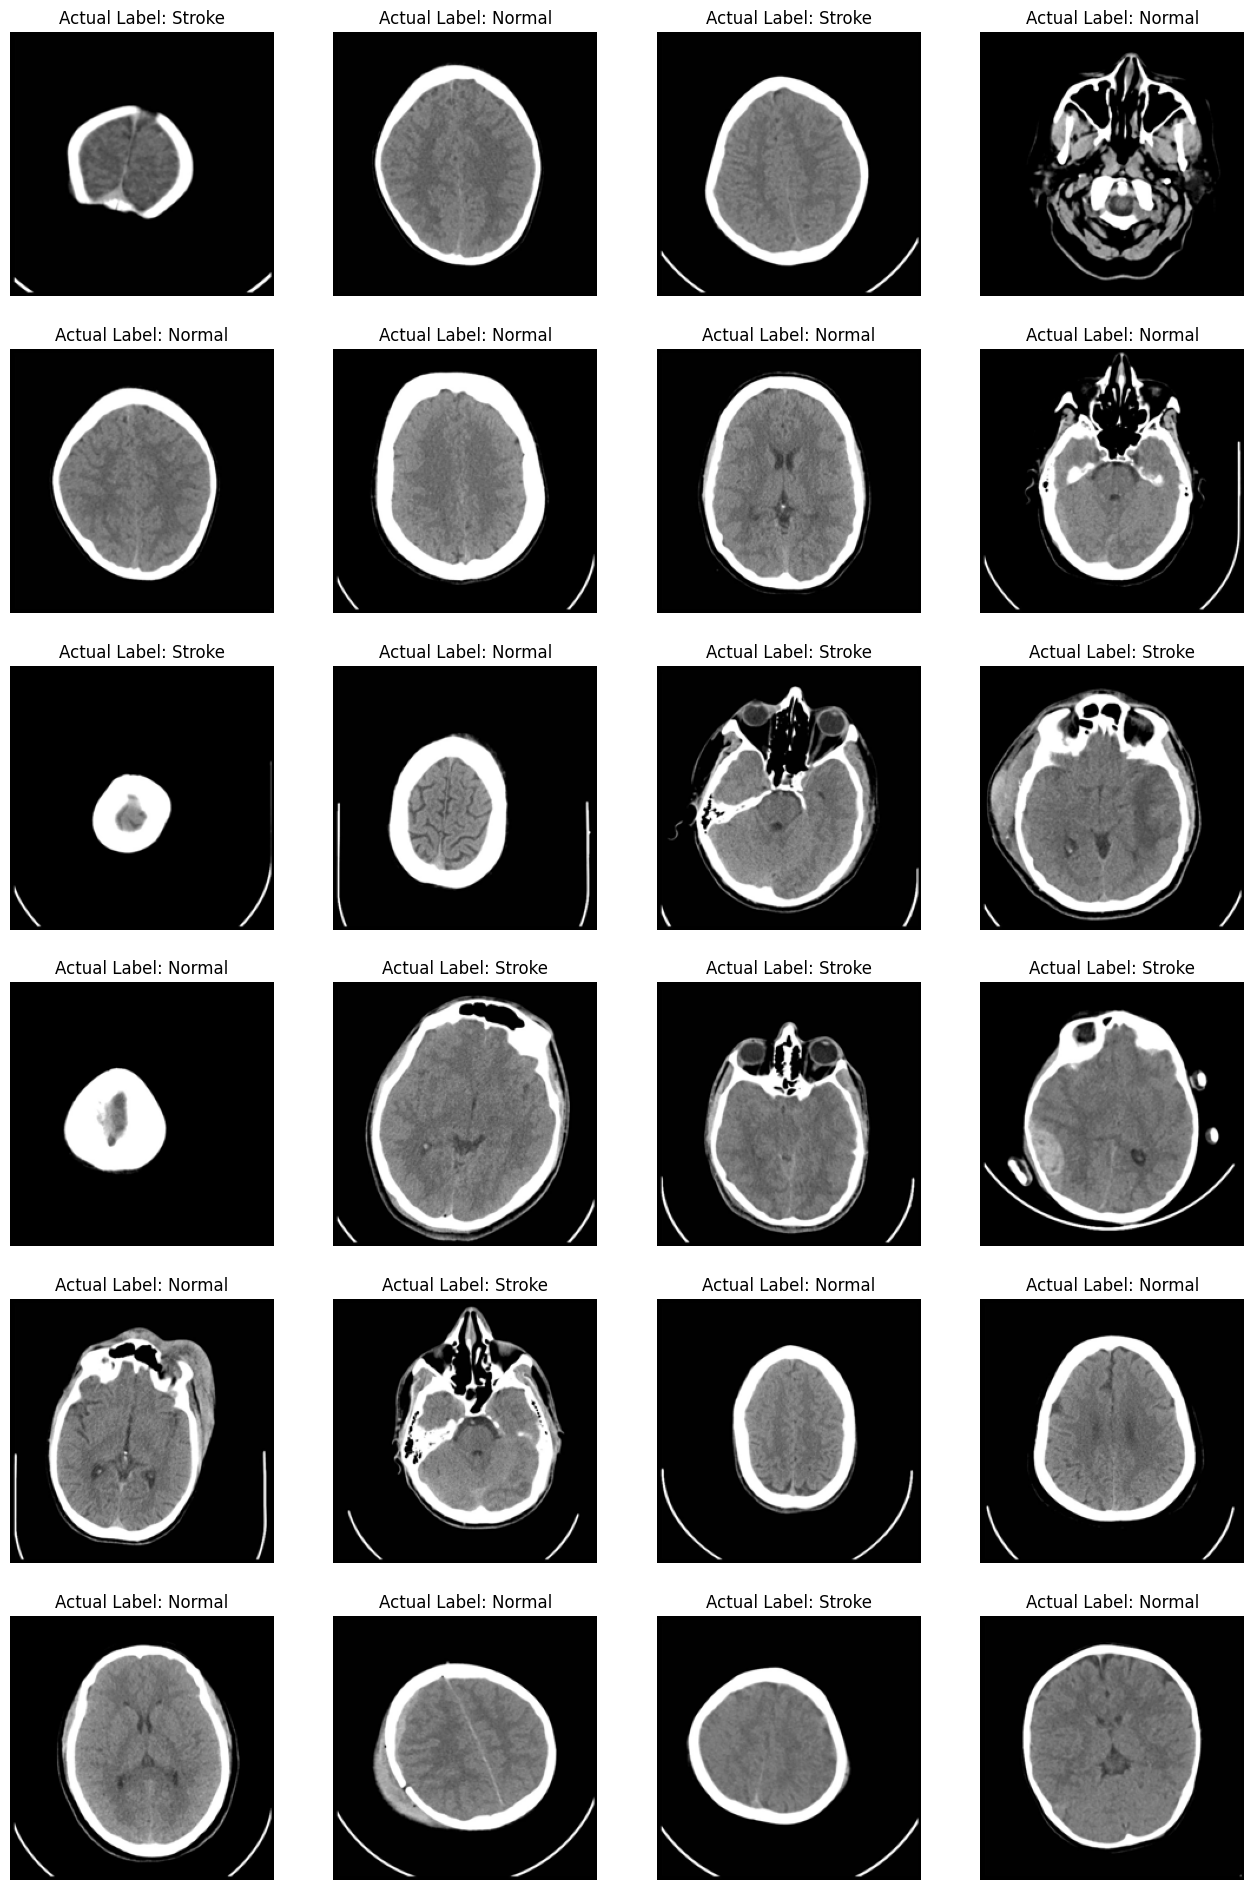

In [ ]:
class_labels = ["Normal", "Stroke"]  # El robot tiene una lista con los nombres de las etiquetas: "Normal" para cerebros sanos y "Stroke" para cerebros con problemas.
plt.figure(figsize=(16,24))  # Prepara una hoja grande donde va a pegar muchas fotos, como un póster.

for i in range(24):  # El robot va a mostrar las primeras 24 fotos de su caja de entrenamiento.
    plt.subplot(6,4,i+1)  # Divide la hoja en 6 filas y 4 columnas, para que cada foto tenga su propio espacio.
    plt.imshow(x_train[i])  # Pega la foto número i en su lugar.
    plt.title(f"Actual Label: {class_labels[y_train[i]]}")  # Escribe arriba de la foto si es "Normal" o "Stroke", usando la etiqueta correcta.
    plt.axis("off")  # Quita los bordes y números de alrededor para que la foto se vea más bonita.

plt.show()  # Muestra el póster con todas las fotos y sus etiquetas.

# Paso 7: Definir y entrenar el modelo CNN

Imagina que el robot está construyendo su propio cerebro para aprender a distinguir entre cerebros sanos y cerebros con problemas, y además tiene un entrenador que le ayuda a no cansarse ni confundirse. Aquí te lo explico para niños, línea a línea, con comentarios:

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping  # El robot tiene un entrenador que le dice cuándo debe dejar de estudiar para no cansarse ni confundirse.
from sklearn.utils.class_weight import compute_class_weight  # El robot aprende a no hacer trampa si hay más fotos de un tipo que de otro, usando pesos especiales.
import numpy as np  # Caja de herramientas para hacer cuentas rápidas.

# Definir el modelo
model = Sequential([  # El robot construye su cerebro apilando bloques uno tras otro.
    Conv2D(100, (3,3), activation="relu", input_shape=(224,224,3), kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # Primer bloque: mira detalles pequeños en la foto y ayuda a no olvidar lo importante.
    MaxPooling2D((2,2)),  # Segundo bloque: resume la información, como cuando ves una foto desde lejos.
    Conv2D(80, (3,3), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # Otro bloque para ver más detalles.
    MaxPooling2D((2,2)),  # Resume otra vez.
    Conv2D(64, (3,3), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # Más bloques para ver detalles.
    MaxPooling2D((2,2)),  # Resume de nuevo.
    Flatten(),  # Aplana toda la información, como si extendiera una hoja arrugada.
    Dense(500, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # Bloque de decisión grande, ayuda a pensar.
    Dropout(0.3),  # El robot olvida un poco a propósito para no confundirse después.
    Dense(500, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # Otro bloque de decisión.
    Dropout(0.3),  # Olvida un poco más.
    Dense(250, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # Otro bloque de decisión, más pequeño.
    Dropout(0.3),  # Olvida un poco más.
    Dense(1, activation="sigmoid")  # Último bloque: decide si la foto es de un cerebro sano o de stroke, como decir sí o no.
])

model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])  # El robot se prepara para aprender, eligiendo cómo mejorar y cómo saber si lo está haciendo bien.

# Calcular los pesos de clase para balancear
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))  # El robot aprende a no hacer trampa si hay más fotos de un tipo que de otro, usando pesos especiales.

# EarlyStopping para evitar sobreajuste
early_stop = EarlyStopping(patience=5, restore_best_weights=True)  # El entrenador le dice al robot que pare de estudiar si ya está aprendiendo bien, para que no se canse ni se confunda.

# Entrenar el modelo usando class_weight y EarlyStopping
history = model.fit(
    x_train_s, y_train,  # El robot estudia con las fotos y etiquetas de entrenamiento.
    batch_size=32,  # Estudia de 32 en 32 fotos, como si estudiara en grupos pequeños.
    epochs=30,  # Puede estudiar hasta 30 veces todo el grupo, pero puede parar antes si aprende rápido.
    validation_data=(x_test_s, y_test),  # Después de estudiar, se prueba con fotos nuevas para ver si aprendió bien.
    callbacks=[early_stop],  # El entrenador le dice cuándo parar.
    class_weight=class_weights  # Usa los pesos especiales para no hacer trampa si hay más fotos de un tipo.
    )


"""El robot construye su cerebro con bloques especiales para ver, resumir, pensar y decidir.
Usa un entrenador que le dice cuándo parar de estudiar para no confundirse.
Si hay más fotos de un tipo que de otro, el robot aprende a no hacer trampa usando pesos especiales.
Estudia en grupos pequeños y se prueba con fotos nuevas para ver si realmente aprendió.
Si aprende rápido, el entrenador le dice que descanse y no siga estudiando de más.
"""



Epoch 1/30


71/71 [==============================] - 130s 2s/step - loss: 1.5946 - accuracy: 0.6267 - val_loss: 1.2620 - val_accuracy: 0.5817
Epoch 2/30
71/71 [==============================] - 112s 2s/step - loss: 0.9469 - accuracy: 0.7702 - val_loss: 0.8094 - val_accuracy: 0.8247
Epoch 3/30
71/71 [==============================] - 109s 2s/step - loss: 0.6619 - accuracy: 0.8960 - val_loss: 0.6155 - val_accuracy: 0.9163
Epoch 4/30
71/71 [==============================] - 113s 2s/step - loss: 0.5368 - accuracy: 0.9369 - val_loss: 0.7207 - val_accuracy: 0.8606
Epoch 5/30
71/71 [==============================] - 115s 2s/step - loss: 0.4522 - accuracy: 0.9649 - val_loss: 0.4674 - val_accuracy: 0.9522
Epoch 6/30
71/71 [==============================] - 110s 2s/step - loss: 0.4076 - accuracy: 0.9680 - val_loss: 0.4567 - val_accuracy: 0.9442
Epoch 7/30
71/71 [==============================] - 106s 1s/step - loss: 0.3481 - accuracy: 0.9840 - val_loss: 0.4037 - val_accuracy: 0.9363
Epoch 8/3

# Paso 8: Evaluar el modelo

In [ ]:
# Evaluar en test
loss_test, acc_test = model.evaluate(x_test_s, y_test)  # El robot hace un examen con preguntas nuevas (fotos que nunca vio) para ver si realmente aprendió.
print("Loss on Test Data:", loss_test)  # Muestra cuánto se equivocó en el examen.
print("Accuracy on Test Data:", acc_test)  # Muestra cuántas respuestas acertó en el examen.

# Evaluar en train
loss_train, acc_train = model.evaluate(x_train_s, y_train)  # Ahora el robot repasa las preguntas que ya conocía (las fotos con las que estudió).
print("Loss on Train Data:", loss_train)  # Muestra cuánto se equivocó en el repaso.
print("Accuracy on Train Data:", acc_train)  # Muestra cuántas respuestas acertó en el repaso.

# Diferencia
diff = acc_train - acc_test  # Calcula la diferencia entre lo bien que le fue en el repaso y en el examen.
print("Diferencia (Train - Test):", diff)  # Si la diferencia es muy grande, significa que el robot memorizó y no aprendió de verdad.

"""
Resumen de los pasos:
# Paso 8: Evaluar el modelo

- El robot hace un examen con preguntas nuevas (fotos que nunca vio) para ver si realmente aprendió.
- Muestra cuánto se equivocó en el examen.
- Muestra cuántas respuestas acertó en el examen.
- El robot repasa las preguntas que ya conocía (las fotos con las que estudió).
- Muestra cuánto se equivocó en el repaso.
- Muestra cuántas respuestas acertó en el repaso.
- Calcula la diferencia entre lo bien que le fue en el repaso y en el examen.
- Si la diferencia es muy grande, el robot solo memorizó y no aprendió de verdad. Si es pequeña, ¡el robot aprendió muy bien!    
"""

8/8 [==============================] - 3s 338ms/step - loss: 0.2558 - accuracy: 0.9681
Loss on Test Data: 0.25580698251724243
Accuracy on Test Data: 0.9681274890899658
71/71 [==============================] - 27s 377ms/step - loss: 0.1943 - accuracy: 0.9947
Loss on Train Data: 0.1943105012178421
Accuracy on Train Data: 0.9946666955947876
Diferencia (Train - Test): 0.026539206504821777


¡Vamos a imaginar que el robot hizo un examen después de estudiar mucho! Aquí te lo explico como si fuera un cuento para niños:

---

### Explicación general para niños

El robot estudió muchas fotos de cerebros y luego hizo dos pruebas:
- Una prueba con fotos nuevas que nunca había visto (como un examen sorpresa).
- Y otra prueba con las fotos que ya conocía (como repasar la tarea).

El robot quiere saber si aprendió bien o solo memorizó. Si le va bien en las dos pruebas y la diferencia no es muy grande, ¡significa que aprendió de verdad!

---

### Explicación detallada de los números

- **Loss on Test Data: 0.2558**  
  Esto es cuánto se equivocó el robot en el examen con fotos nuevas. Un número pequeño es bueno, significa que casi no se equivocó.

- **Accuracy on Test Data: 0.9681**  
  Esto es cuántas respuestas acertó el robot en el examen sorpresa. 0.9681 significa que acertó el 96.8% de las veces, ¡eso es excelente!

- **Loss on Train Data: 0.1943**  
  Esto es cuánto se equivocó el robot cuando repasó las fotos que ya conocía. Es aún más pequeño, lo que es normal porque ya las había visto.

- **Accuracy on Train Data: 0.9947**  
  Aquí el robot acertó el 99.47% de las veces con las fotos que usó para estudiar. ¡Casi perfecto!

- **Diferencia (Train - Test): 0.0265**  
  Esto es la diferencia entre lo bien que le fue en el repaso y en el examen. Es solo 0.0265 (o 2.65%), lo que es muy poquito. Si la diferencia fuera muy grande, significaría que el robot solo memorizó, pero aquí aprendió de verdad.

---

### ¿Qué significan las filas y columnas?

- **Filas:** Cada fila muestra un resultado diferente: primero el examen sorpresa, luego el repaso, y al final la diferencia.
- **Columnas:** Muestran dos cosas importantes: "loss" (cuánto se equivocó) y "accuracy" (cuántas veces acertó).

---

### Conclusiones y recomendaciones

- ¡El robot aprendió muy bien! Acertó casi todas las respuestas, tanto en el examen como en el repaso.
- La diferencia entre el repaso y el examen es pequeña, así que el robot no solo memorizó, sino que realmente entiende cómo distinguir las fotos.
- Puedes estar tranquilo: tu modelo no está sobreajustado (no se aprendió de memoria), y está listo para ayudar a reconocer cerebros sanos y con problemas en fotos nuevas.

**Recomendación:**  
Sigue probando con más fotos nuevas y, si quieres mejorar aún más, puedes agregar más ejemplos diferentes para que el robot sea aún más inteligente.

---

¡Así, el robot se convierte en un gran ayudante para los doctores, porque aprendió de verdad y no solo de memoria!

# Paso 9: Métricas y curvas ROC/PR

Imagina que el robot, después de estudiar mucho, quiere mostrarle a todos qué tan bien aprendió a distinguir cerebros sanos de cerebros con problemas. Así que hace varios juegos y exámenes para demostrarlo. Aquí te lo explico para niños, línea a línea, con comentarios:

8/8 [==============================] - 3s 340ms/step
Confusion Matrix:
 [[143   6]
 [  2 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       149
           1       0.94      0.98      0.96       102

    accuracy                           0.97       251
   macro avg       0.96      0.97      0.97       251
weighted avg       0.97      0.97      0.97       251

ROC - Area :0.9974338728780103


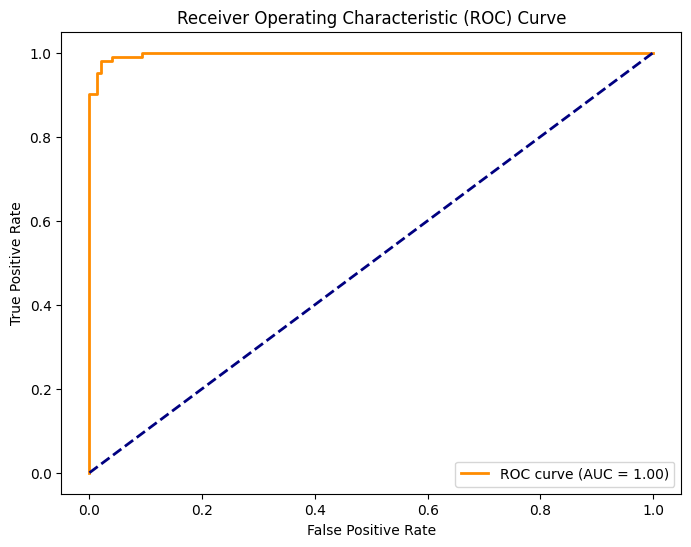

PR - Area :0.9963736912017195


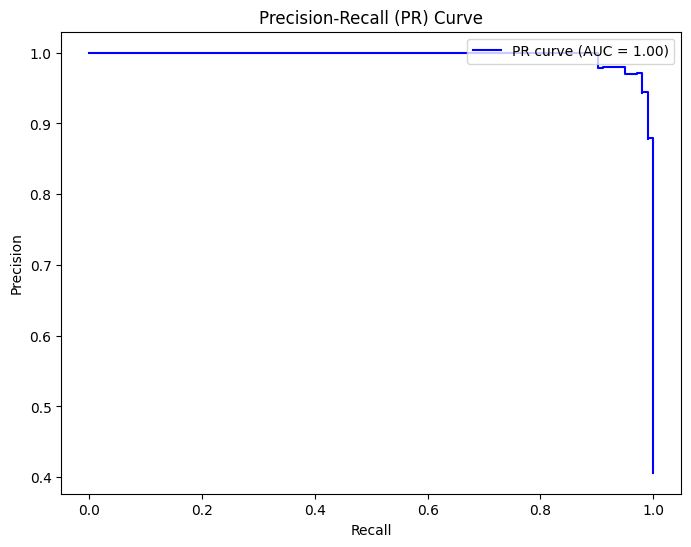

8/8 [==============================] - 3s 375ms/step
  Balanceador  Accuracy Train  Accuracy Test  Precision Test  Recall Test  \
0          Sí          0.9947         0.9681          0.9434       0.9804   

   F1 Test  Diferencia abs Tipo de ajuste  Umbral  
0   0.9615          0.0265    Buen ajuste     0.5  


In [ ]:
# Predicciones
y_pred_test = model.predict(x_test_s)  # El robot mira las fotos del examen y dice si cree que son sanas o de stroke.
y_pred_test_label = [1 if i>=0.5 else 0 for i in y_pred_test]  # Si el robot está más del 50% seguro, dice "stroke", si no, dice "normal".

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_label))  # Muestra una tabla que dice cuántas veces acertó y cuántas se equivocó.
print("Classification Report:\n", classification_report(y_test, y_pred_test_label))  # Muestra un reporte con más detalles de sus aciertos y errores.

# ROC Curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_test)  # Calcula cómo de bueno es el robot para distinguir entre sanos y stroke en diferentes niveles de seguridad.
roc_auc = auc(fpr, tpr)  # Calcula el área bajo la curva, cuanto más cerca de 1, mejor.
print(f"ROC - Area :{roc_auc}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')  # Dibuja la curva ROC.
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea de referencia (si el robot adivinara al azar).
plt.xlabel('False Positive Rate')  # Eje X: cuántas veces se equivoca diciendo "stroke" cuando es sano.
plt.ylabel('True Positive Rate')  # Eje Y: cuántas veces acierta diciendo "stroke" cuando es stroke.
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# PR Curve
precision, recall, threshold = precision_recall_curve(y_test, y_pred_test)  # Calcula precisión y recall para diferentes umbrales.
pr_auc = auc(recall, precision)  # Área bajo la curva PR, cuanto más grande, mejor.
print(f"PR - Area :{pr_auc}")

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AUC = {pr_auc:.2f})')  # Dibuja la curva PR.
plt.xlabel('Recall')  # Eje X: cuántos strokes detectó bien.
plt.ylabel('Precision')  # Eje Y: de los que dijo "stroke", cuántos eran de verdad.
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='upper right')
plt.show()

import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluar en train y test
loss_train, acc_train = model.evaluate(x_train_s, y_train, verbose=0)  # El robot repasa las fotos que ya conocía.
loss_test, acc_test = model.evaluate(x_test_s, y_test, verbose=0)  # El robot hace el examen con fotos nuevas.

# Predicciones
y_pred_test = model.predict(x_test_s)
y_pred_test_label = [1 if i>=0.5 else 0 for i in y_pred_test]

# Métricas
precision_test = precision_score(y_test, y_pred_test_label)  # De los que dijo "stroke", cuántos eran de verdad.
recall_test = recall_score(y_test, y_pred_test_label)  # De todos los strokes, cuántos detectó bien.
f1_test = f1_score(y_test, y_pred_test_label)  # Un puntaje que combina precisión y recall.
diff = abs(acc_train - acc_test)  # Diferencia entre lo bien que le fue estudiando y en el examen.

# Tipo de ajuste
if acc_train > acc_test + 0.05:
    ajuste = "Overfitting"  # Si le va mucho mejor estudiando que en el examen, memorizó y no aprendió de verdad.
elif acc_test > acc_train + 0.05:
    ajuste = "Underfitting"  # Si le va mejor en el examen que estudiando, no aprendió bien.
else:
    ajuste = "Buen ajuste"  # Si le va parecido en ambos, aprendió bien.

# ¿Se usó balanceador?
balanceador = "Sí"  # Porque sí usaste class_weight

# Mostrar cuadro resumen
df_resumen = pd.DataFrame([{
    "Balanceador": balanceador,  # ¿El robot usó ayuda para no hacer trampa si había más fotos de un tipo?
    "Accuracy Train": round(acc_train, 4),  # Qué tan bien le fue estudiando.
    "Accuracy Test": round(acc_test, 4),  # Qué tan bien le fue en el examen.
    "Precision Test": round(precision_test, 4),  # De los que dijo "stroke", cuántos eran de verdad.
    "Recall Test": round(recall_test, 4),  # De todos los strokes, cuántos detectó bien.
    "F1 Test": round(f1_test, 4),  # Puntaje combinado.
    "Diferencia abs": round(diff, 4),  # Diferencia entre estudiar y examen.
    "Tipo de ajuste": ajuste,  # Diagnóstico: ¿memorizó, no aprendió, o aprendió bien?
    "Umbral": 0.5  # El nivel de seguridad para decir "stroke".
}])

print(df_resumen)

¡Vamos a imaginar que el robot hizo un gran examen para ver si aprendió a distinguir cerebros sanos de cerebros con problemas!  
Te lo explico como un cuento para niños, paso a paso, usando los gráficos y los números que mostraste.

---

## 1. **Explicación general (como un cuento)**

El robot estudió muchas fotos y luego hizo un examen con fotos nuevas.  
Para saber qué tan bien lo hizo, usamos:
- Una tabla de aciertos y errores (matriz de confusión).
- Un reporte de calificaciones (classification report).
- Dos dibujos mágicos: la curva ROC y la curva PR, que muestran lo bueno que es el robot adivinando.
- Un resumen con sus mejores notas.

¡Vamos a ver cómo le fue!

---

## 2. **Explicación detallada de los resultados y gráficos**

### **A. Matriz de confusión**

```
[[143   6]
 [  2 100]]
```
- **Filas:** Lo que realmente era la foto (0 = sano, 1 = stroke).
- **Columnas:** Lo que el robot dijo que era (0 = sano, 1 = stroke).

|                | Predijo Sano | Predijo Stroke |
|----------------|--------------|---------------|
| **Era Sano**   |     143      |      6        |
| **Era Stroke** |      2       |     100       |

- **143:** El robot acertó diciendo "sano" cuando era sano.
- **6:** Dijo "stroke" cuando era sano (falso positivo).
- **2:** Dijo "sano" cuando era stroke (falso negativo).
- **100:** Acertó diciendo "stroke" cuando era stroke.

**¡El robot acertó la mayoría de las veces!**

---

### **B. Classification Report**

- **Precision:** De todos los que el robot dijo "stroke", ¿cuántos eran de verdad? (0.94)
- **Recall:** De todos los strokes reales, ¿cuántos encontró el robot? (0.98)
- **F1-score:** Un puntaje que combina precisión y recall (0.96)
- **Accuracy:** ¿Cuántas veces acertó en total? (0.97 o 97%)

---

### **C. Curva ROC (Gráfico naranja)**

- **Línea naranja:** Muestra lo bueno que es el robot para distinguir entre sano y stroke.
- **Línea punteada azul:** Es como si el robot adivinara al azar (no sabe nada).
- **Cuanto más arriba y a la izquierda esté la línea naranja, mejor.**
- **AUC = 1.00:** ¡El robot es casi perfecto! (AUC cerca de 1 es excelente).

**¿Cómo leerlo?**
- Si la línea naranja está pegada al borde superior izquierdo, el robot es muy bueno.
- Si está cerca de la línea punteada, el robot no aprendió nada.

---

### **D. Curva PR (Gráfico azul)**

- **Línea azul:** Muestra la relación entre precisión y recall.
- **Cuanto más arriba esté la línea, mejor.**
- **AUC = 1.00:** ¡El robot es muy preciso y encuentra casi todos los strokes!

**¿Cómo leerlo?**
- Si la línea azul está cerca de 1 en precisión y recall, el robot es excelente.
- Si baja mucho, el robot se confunde.

---

### **E. Cuadro resumen**

| Balanceador | Accuracy Train | Accuracy Test | Precision Test | Recall Test | F1 Test | Diferencia abs | Tipo de ajuste | Umbral |
|-------------|---------------|--------------|---------------|-------------|---------|----------------|----------------|--------|
|     Sí      |    0.9947     |   0.9681     |    0.9434     |   0.9804    | 0.9615  |    0.0265      | Buen ajuste    |  0.5   |

- **Balanceador:** Sí (el robot usó ayuda para no hacer trampa si había más fotos de un tipo).
- **Accuracy Train:** 0.9947 (¡Casi perfecto estudiando!).
- **Accuracy Test:** 0.9681 (¡Muy bien en el examen!).
- **Precision Test:** 0.9434 (De los que dijo "stroke", el 94% eran de verdad).
- **Recall Test:** 0.9804 (Encontró el 98% de los strokes reales).
- **F1 Test:** 0.9615 (Puntaje combinado, excelente).
- **Diferencia abs:** 0.0265 (La diferencia entre estudiar y el examen es muy pequeña).
- **Tipo de ajuste:** Buen ajuste (el robot no memorizó, ¡aprendió de verdad!).
- **Umbral:** 0.5 (El nivel de seguridad para decir "stroke").

---

## 3. **Conclusiones y recomendaciones**

- **¡El robot aprendió muy bien!** Acertó casi todas las veces, tanto estudiando como en el examen.
- **Las curvas ROC y PR muestran que el robot es excelente distinguiendo cerebros sanos de stroke.**
- **La diferencia entre estudiar y el examen es pequeña:** el robot no memorizó, sino que realmente entiende.
- **Recomendación:** Puedes confiar en el robot, pero siempre es bueno probar con más fotos nuevas y diferentes para que siga aprendiendo y no se confunda con casos raros.

---

## 4. **¿Qué ha pasado?**

El robot estudió, hizo un examen difícil, y demostró que aprendió de verdad.  
¡Ahora puede ayudar a los doctores a encontrar cerebros con problemas y salvar vidas!

---

**¡Así, el robot se convierte en un superhéroe de la medicina, porque aprendió a distinguir cerebros sanos de cerebros con problemas y lo hace muy, muy bien!**

# 10. Visualización de resultados de entrenamiento

# ¿Para qué sirve esto?


El robot quiere mostrar cómo fue mejorando mientras estudiaba y cómo le fue en los exámenes sorpresa.
Así podemos ver si el robot aprendió bien, si se confundió, o si memorizó sin entender.
Explicación para niños, línea a línea:


El robot dibuja dos gráficos: uno de sus aciertos (precisión) y otro de sus errores (pérdida) en cada clase.
En cada gráfico, hay dos líneas: una para cuando estudia y otra para cuando hace exámenes sorpresa.
Si las líneas suben en precisión y bajan en pérdida, ¡el robot está aprendiendo!
Si las líneas de entrenamiento y validación están muy separadas, el robot puede estar memorizando y no aprendiendo de verdad.
Al final, muestra una tabla con sus mejores notas para que todos vean lo bien que lo hizo.
Ejemplo para niños:


Imagina que tú estudias para un examen y cada día te pones una nota. Si cada vez aciertas más y te equivocas menos, ¡vas mejorando! El robot hace lo mismo y te muestra sus notas en un dibujo para que veas su progreso.

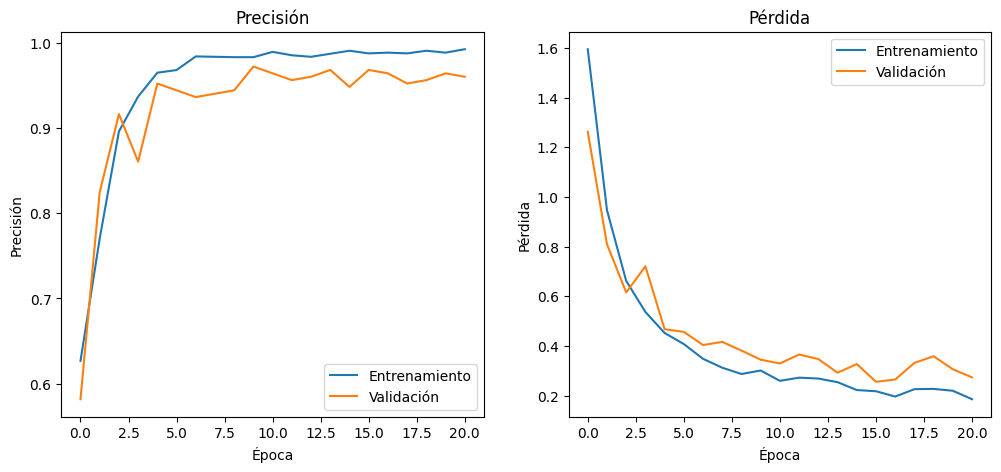

In [ ]:
plt.figure(figsize=(12,5))  # El robot prepara una hoja grande para dibujar dos gráficos, como si fuera una cartulina.

plt.subplot(1,2,1)  # Divide la hoja en dos partes, y en la primera va a dibujar la precisión.
plt.plot(history.history['accuracy'], label='Entrenamiento')  # Dibuja una línea que muestra qué tan bien lo hizo el robot mientras estudiaba.
plt.plot(history.history['val_accuracy'], label='Validación')  # Dibuja otra línea que muestra qué tan bien lo hizo el robot en los exámenes sorpresa.
plt.title('Precisión')  # Le pone título al dibujo: "Precisión".
plt.xlabel('Época')  # Abajo pone los números de las clases (épocas).
plt.ylabel('Precisión')  # Al costado pone la nota (precisión).
plt.legend()  # Agrega una leyenda para saber cuál línea es cuál.

plt.subplot(1,2,2)  # Ahora va a dibujar en la segunda parte de la hoja.
plt.plot(history.history['loss'], label='Entrenamiento')  # Dibuja una línea que muestra cuántos errores cometió el robot mientras estudiaba.
plt.plot(history.history['val_loss'], label='Validación')  # Dibuja otra línea para los errores en los exámenes sorpresa.
plt.title('Pérdida')  # Le pone título: "Pérdida" (que significa errores).
plt.xlabel('Época')  # Abajo pone los números de las clases.
plt.ylabel('Pérdida')  # Al costado pone la cantidad de errores.
plt.legend()  # Agrega una leyenda para saber cuál línea es cuál.

plt.show()  # Muestra los dos dibujos para que todos los vean.

print(df_resumen)  # Muestra una tabla resumen con las mejores notas del robot.

¡Vamos a leer juntos estos dos gráficos como si fueran los dibujos del cuaderno del robot mientras aprende!

---

### ¿Por dónde empezar a ver?

1. **Empieza por el gráfico de la izquierda:**  
   - Se llama **Precisión**.  
   - Muestra qué tan bien acierta el robot en cada clase (época) mientras estudia.

2. **Luego mira el gráfico de la derecha:**  
   - Se llama **Pérdida**.  
   - Muestra cuántos errores comete el robot en cada clase.

---

### ¿Qué significa cada color?

- **Azul:**  
  - Es la línea de **Entrenamiento**.  
  - Muestra cómo le va al robot con las fotos que ya conoce (las que usó para estudiar).

- **Naranja:**  
  - Es la línea de **Validación**.  
  - Muestra cómo le va al robot con fotos nuevas (como un examen sorpresa).

---

### ¿Qué dicen los gráficos?

#### **Gráfico de Precisión (izquierda):**
- El eje de abajo (**Época**) es como los días de clase: mientras más a la derecha, más tiempo ha estudiado el robot.
- El eje de la izquierda (**Precisión**) es la nota del robot: mientras más arriba, mejor.
- Ambas líneas suben rápido al principio, lo que significa que el robot aprende mucho en las primeras clases.
- Luego, las líneas se mantienen altas y estables, ¡el robot sigue acertando mucho!

#### **Gráfico de Pérdida (derecha):**
- El eje de abajo (**Época**) es igual: los días de clase.
- El eje de la izquierda (**Pérdida**) es la cantidad de errores: mientras más abajo, mejor.
- Ambas líneas bajan rápido al principio, lo que significa que el robot comete menos errores conforme aprende.
- Después, las líneas se mantienen bajitas y estables, ¡el robot casi no se equivoca!

---

### ¿Cuál color es más importante?

- **Ambos colores son importantes** porque:
  - El azul te dice si el robot aprendió bien con lo que estudió.
  - El naranja te dice si el robot puede acertar con cosas nuevas (¡esto es lo más importante para saber si realmente aprendió!).

---

### ¿Qué conclusiones sacar?

- Si las dos líneas (azul y naranja) están cerca y arriba en precisión, y abajo en pérdida, **el robot aprendió bien y no solo memorizó**.
- Si la línea naranja baja mucho o se separa mucho de la azul, el robot podría estar memorizando y no aprendiendo de verdad (¡ojo con eso!).

---

### ¿Cómo sacar conclusiones y cuándo?

- **Después de varias épocas (clases),** mira si las líneas se mantienen juntas y estables.
- Si sí, ¡puedes decir que el robot está listo para ayudar!
- Si no, tal vez necesite más ejemplos, menos dificultad, o cambiar la forma de estudiar.

---

### ¿Cómo mejorar?

- Si la línea naranja baja mucho o se separa, puedes:
  - Agregar más fotos nuevas para que el robot practique.
  - Cambiar el modelo para que no memorice tanto.
  - Usar técnicas como “regularización” o “dropout” (¡como hacerle preguntas sorpresa al robot!).

---

**En resumen:**  
El robot aprendió muy bien, porque ambas líneas están altas (precisión) y bajas (pérdida), y no se separan mucho. ¡Eso significa que no solo memorizó, sino que realmente entiende y puede ayudar con fotos nuevas!

# 11. Matriz de confusión

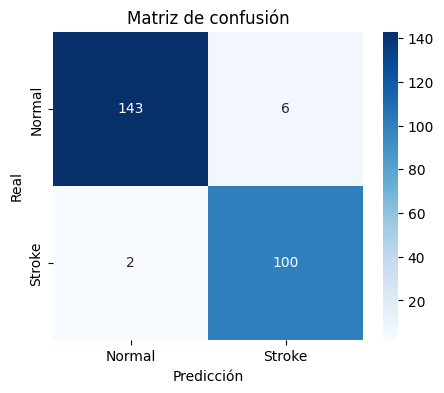

In [ ]:
# 1. Importar herramientas mágicas
import seaborn as sns  # (1) Trae los crayones mágicos para dibujar cuadros bonitos.
from sklearn.metrics import confusion_matrix  # (2) Trae la calculadora especial para contar aciertos y errores.

# 2. Definir los nombres de las etiquetas
class_labels = ["Normal", "Stroke"]  # (3) El robot pone nombre a las dos clases: "Normal" (cerebro sano) y "Stroke" (cerebro con problema).

# 3. Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred_test_label)  # (4) El robot cuenta cuántas veces acertó y cuántas se equivocó, y lo pone en una tabla.

# 4. Dibujar la matriz de confusión
plt.figure(figsize=(5,4))  # (5) Prepara una hoja de tamaño mediano para dibujar.
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, 
            yticklabels=class_labels)  # (6) Dibuja la tabla con colores azules y pone los nombres de las clases en los lados.
plt.xlabel('Predicción')  # (7) Escribe abajo: "Predicción", para saber qué dijo el robot.
plt.ylabel('Real')  # (8) Escribe al costado: "Real", para saber qué era en verdad la foto.
plt.title('Matriz de confusión')  # (9) Le pone un título bonito arriba.
plt.show()  # (10) Muestra el dibujo para que todos lo vean.

¡Vamos a leer juntos la imagen de la matriz de confusión como si fuera un tablero de resultados del robot!

---

### ¿Por dónde empezar a ver?

1. **Mira el título:**  
   Arriba dice "Matriz de confusión". Es una tabla mágica que muestra cuántas veces el robot acertó y cuántas se equivocó.

2. **Lee los nombres de los lados:**  
   - **Izquierda (Real):** Lo que realmente era la foto (Normal o Stroke).
   - **Abajo (Predicción):** Lo que el robot dijo que era (Normal o Stroke).

---

### ¿Qué significa cada color?

- **Azul oscuro:**  
  Muchos aciertos, el robot lo hizo muy bien ahí.
- **Azul claro:**  
  Menos aciertos o más errores, el robot se equivocó más en esas casillas.

---

### ¿Qué dicen los números?

- **143 (arriba a la izquierda):**  
  El robot dijo "Normal" y era "Normal" (¡acertó!).
- **100 (abajo a la derecha):**  
  El robot dijo "Stroke" y era "Stroke" (¡acertó!).
- **6 (arriba a la derecha):**  
  El robot dijo "Stroke" pero era "Normal" (se equivocó, falso positivo).
- **2 (abajo a la izquierda):**  
  El robot dijo "Normal" pero era "Stroke" (se equivocó, falso negativo).

---

### ¿Cuál color es más importante?

- **El azul más oscuro (diagonal):**  
  Es el más importante porque muestra los aciertos del robot.  
  ¡Queremos que esos cuadros sean los más oscuros posibles!

---

### ¿Qué conclusiones sacar?

- El robot acertó la mayoría de las veces (143 y 100).
- Se equivocó pocas veces (6 y 2).
- ¡El robot es muy bueno distinguiendo cerebros sanos de cerebros con problemas!

---

### ¿Cómo sacar las conclusiones y cuándo?

- **Después de ver los números y colores:**  
  Si los cuadros de la diagonal (de arriba izquierda a abajo derecha) son oscuros y tienen números grandes, el robot aprendió bien.
- Si los cuadros fuera de la diagonal tienen números pequeños y colores claros, el robot casi no se equivoca.

---

### ¿Cómo mejorar?

- Si quieres que el robot se equivoque aún menos:
  - Dale más ejemplos para estudiar.
  - Prueba con fotos nuevas y diferentes.
  - Ajusta el modelo si ves que siempre se equivoca en el mismo tipo de caso.

---

**En resumen:**  
¡El robot es un gran ayudante! Acertó casi todas las veces y solo se equivocó un poquito.  
La matriz de confusión te ayuda a ver fácil y rápido si el robot está listo para ayudar a los doctores.

# Paso 12. Visualizar predicciones

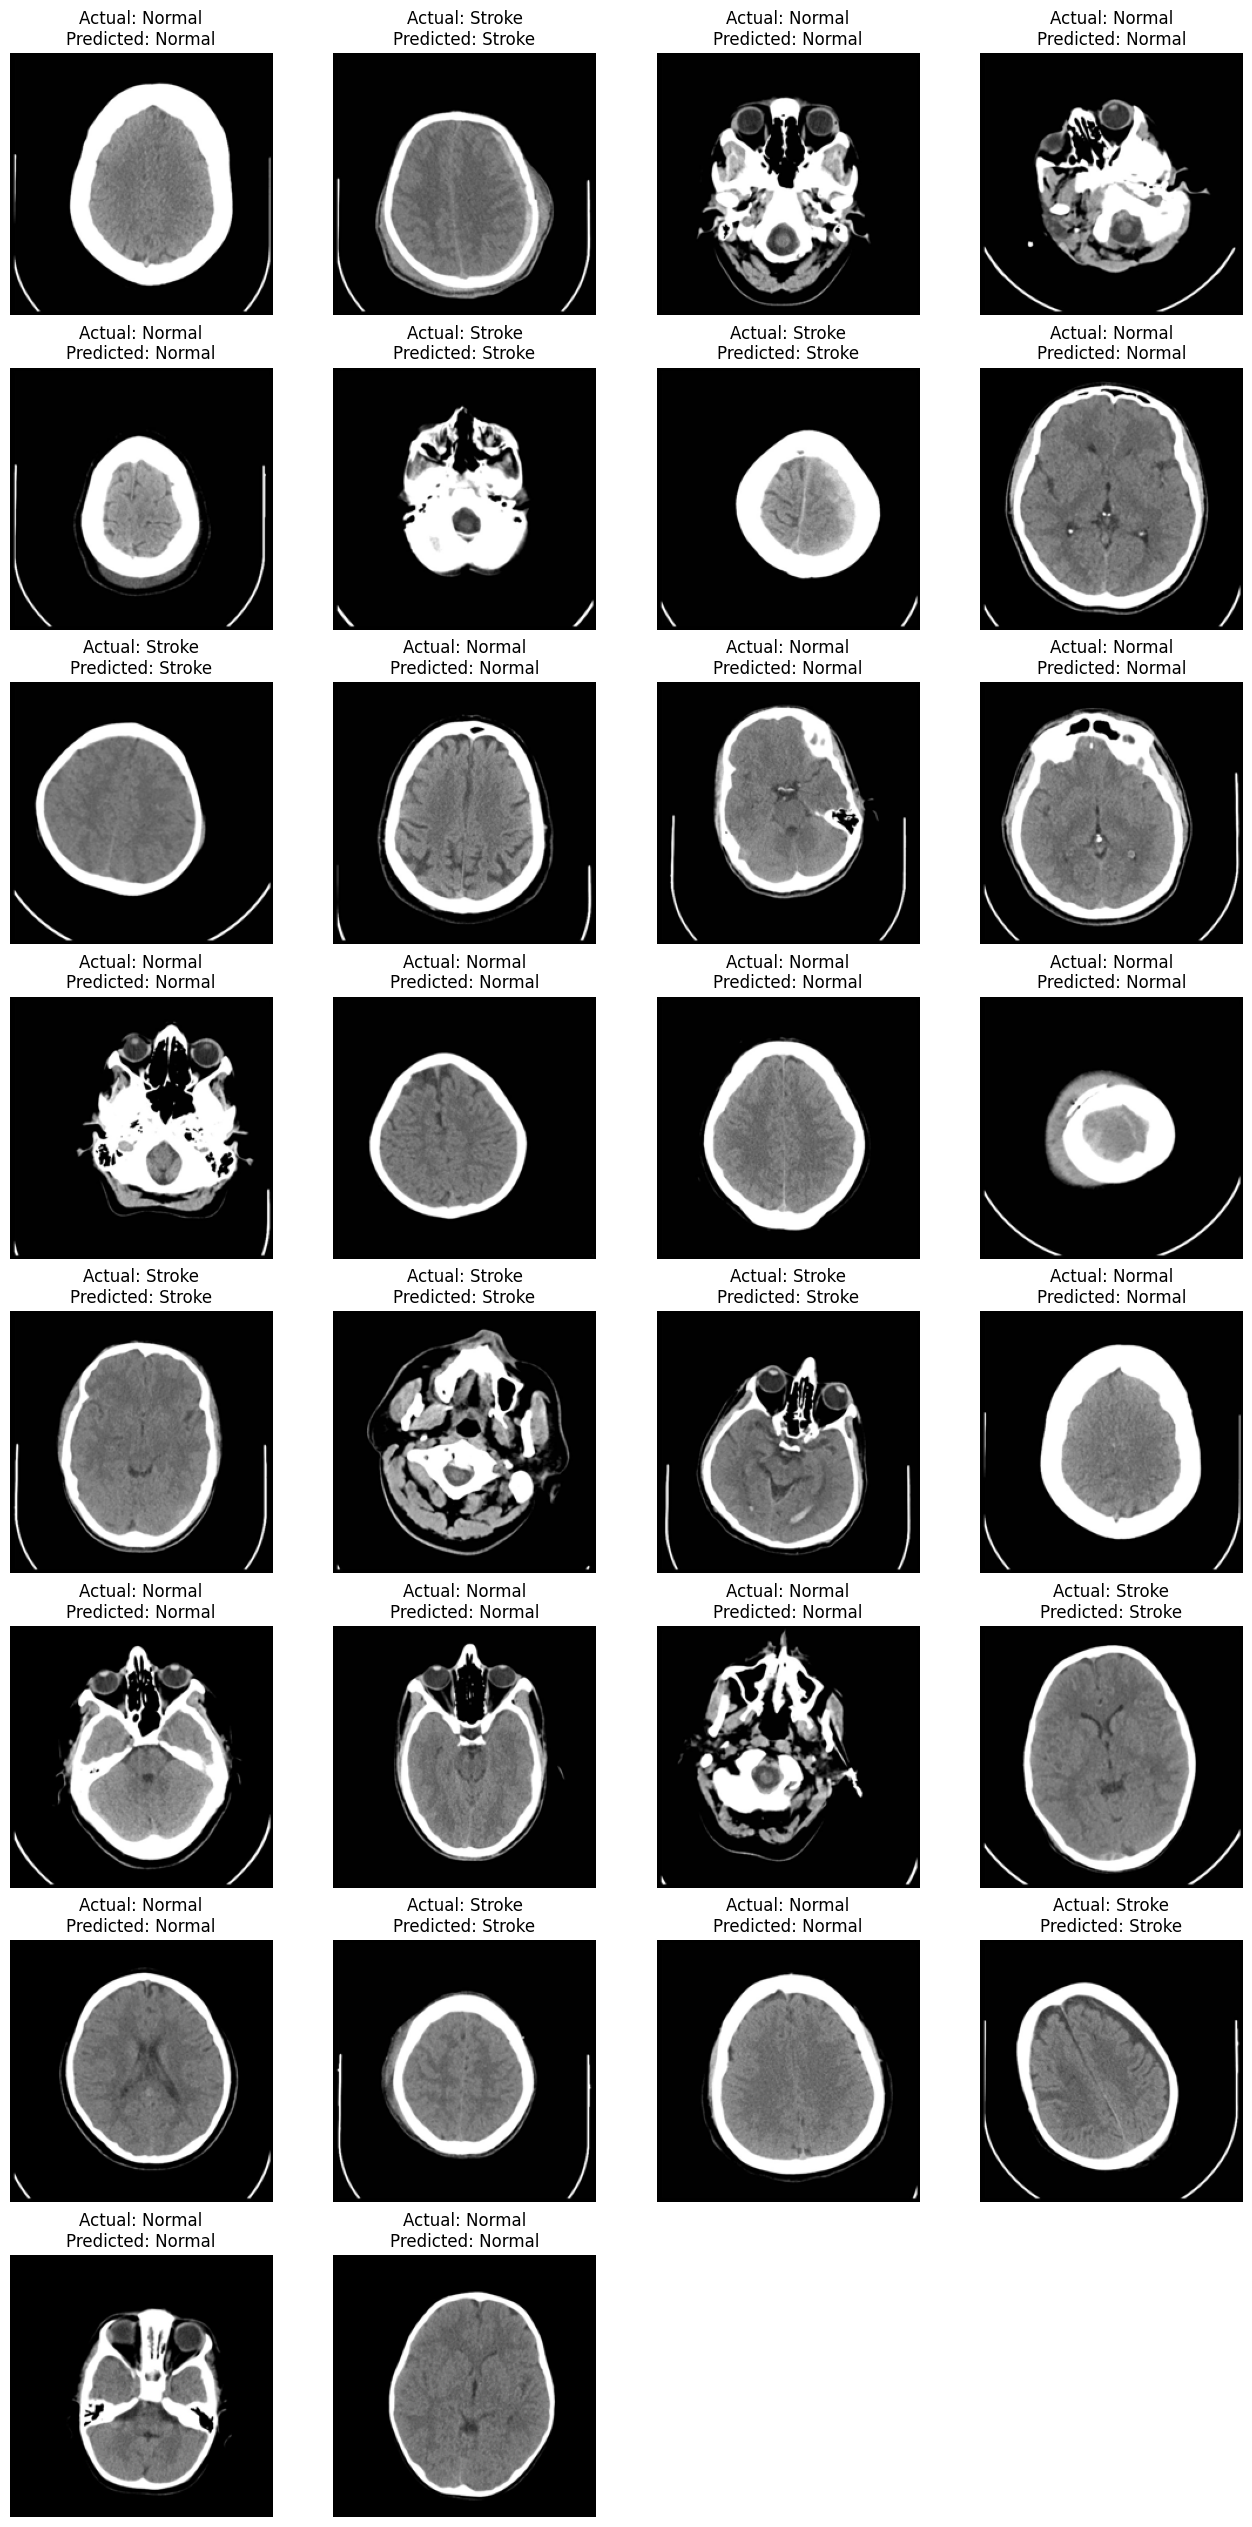

In [ ]:
# 1. Preparar la hoja grande para el álbum de fotos
plt.figure(figsize=(16,32))  # (1) El robot prepara una hoja gigante para pegar muchas fotos y que todos puedan verlas bien.

# 2. Mostrar varias fotos con sus etiquetas reales y predichas
for i in range(30):  # (2) El robot va a mostrar las primeras 30 fotos del examen.
    plt.subplot(8,4,i+1)  # (3) Divide la hoja en 8 filas y 4 columnas, y pone cada foto en su lugar como si fuera un álbum.
    plt.imshow(x_test[i])  # (4) Pega la foto número i en su espacio.
    plt.title(f"Actual: {class_labels[y_test[i]]}\nPredicted: {class_labels[y_pred_test_label[i]]}")  # (5) Escribe arriba de la foto dos cosas: qué era en verdad y qué dijo el robot.
    plt.axis("off")  # (6) Quita los bordes y números para que la foto se vea más bonita.

# 3. Mostrar el álbum completo
plt.show()  # (7) Muestra el álbum de fotos para que todos puedan ver cómo lo hizo el robot.



"""

Preparar la hoja grande:
El robot saca una hoja gigante para pegar muchas fotos, como cuando haces un póster para la escuela.

Mostrar varias fotos:
El robot elige 30 fotos del examen y las pega una por una en la hoja.
Para cada foto, escribe dos cosas importantes:

Qué era la foto en realidad (por ejemplo, "Normal" o "Stroke").
Qué pensó el robot que era (su predicción).
Así, todos pueden ver si el robot acertó o se equivocó.
Mostrar el álbum completo:
Cuando termina de pegar y escribir en todas las fotos, el robot muestra el póster para que todos puedan ver cómo le fue en el examen.

Ejemplo para niños:
Imagina que tú y tus amigos hacen un álbum de estampas. En cada estampa, escriben si es de un perrito o un gatito, y luego ven si adivinaron bien. Así, pueden ver fácilmente quién acertó más veces.
¡El robot hace lo mismo con las fotos de cerebros y sus respuestas!
"""

¡Vamos a leer juntos la imagen como si fuera un álbum de estampas del robot!

---

### 1. **¿Qué dice la imagen? (Explicación general)**

Esta imagen es como un póster donde el robot pegó varias fotos de tomografías de cerebro.  
En cada foto, el robot escribió dos cosas:
- **Actual:** Lo que realmente era la imagen (por ejemplo, "Normal" o "Stroke").
- **Predicted:** Lo que el robot pensó que era esa imagen.

Así, podemos ver si el robot acertó o se equivocó en cada caso.

---

### 2. **¿Cómo interpretarla? (Paso a paso)**

- **Columnas y filas:**  
  Cada fila y columna muestra varias imágenes diferentes.  
  No importa tanto el orden, sino mirar cada foto y leer el texto arriba.

- **Colores:**  
  Todas las imágenes son en blanco y negro porque son tomografías.  
  El color importante aquí es el texto:  
  - Si "Actual" y "Predicted" dicen lo mismo, ¡el robot acertó!
  - Si son diferentes, el robot se equivocó en esa imagen.

- **¿Por dónde empezar a ver?**  
  Empieza por la primera imagen arriba a la izquierda y sigue hacia abajo o hacia la derecha, leyendo el texto de cada foto.

---

### 3. **¿Qué conclusiones sacar?**

- **Si la mayoría de las fotos tienen "Actual" igual a "Predicted", el robot está haciendo un gran trabajo.**
- Si ves varias fotos donde "Actual" y "Predicted" son diferentes, ahí el robot se equivocó y podrías revisar por qué.

---

### 4. **¿Cómo sacar las conclusiones y cuándo?**

- **Después de mirar varias fotos:**  
  Si casi todas las predicciones son correctas, puedes confiar en el robot.
- **Si hay errores:**  
  Mira si siempre se equivoca en el mismo tipo de imagen. Eso te puede decir qué necesita mejorar.

---

### 5. **¿Cómo mejorar?**

- Dale al robot más ejemplos de las imágenes donde se equivoca.
- Prueba con imágenes nuevas y variadas.
- Ajusta el modelo para que aprenda mejor de los casos difíciles.

---

**En resumen:**  
Este póster te ayuda a ver, de manera visual y rápida, cómo está pensando el robot y si realmente aprendió a distinguir entre cerebros sanos y con problemas.  
¡Así puedes confiar en él o ayudarlo a mejorar!

# 13. Interpretabilidad (LIME, saliency, etc.)
- **Para LIME y mapas de saliencia puedes usar librerías como lime y tf-keras-vis.**
- **Ejemplo básico de mapa de saliencia:**

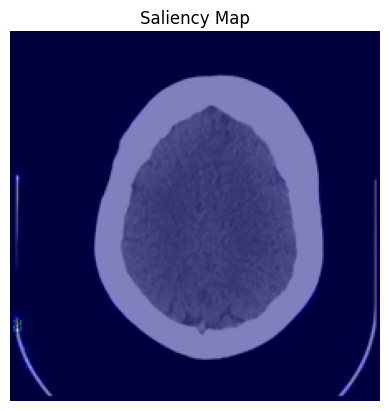

In [ ]:

# 1. Importar herramientas mágicas
import tensorflow as tf  # (1) El robot usa TensorFlow para pensar y calcular.
import matplotlib.pyplot as plt  # (2) Trae los crayones mágicos para dibujar.
import numpy as np  # (3) Caja de herramientas para hacer cuentas rápidas.

# 2. Seleccionar una imagen de prueba
img = x_test_s[0:1]  # (4) El robot elige la primera imagen de su examen para analizarla.
img_original = x_test[0]  # (5) Guarda la imagen original para mostrarla después.

# 3. Preparar la imagen para el robot
img_tensor = tf.convert_to_tensor(img)  # (6) Convierte la imagen en algo que el robot pueda entender y calcular.

# 4. Calcular el mapa de importancia (Saliency Map)
with tf.GradientTape() as tape:  # (7) El robot se pone unos lentes especiales para ver qué partes de la imagen son más importantes.
    tape.watch(img_tensor)  # (8) Le dice a los lentes que miren la imagen muy de cerca.
    pred = model(img_tensor)  # (9) El robot hace una predicción sobre la imagen.
grads = tape.gradient(pred, img_tensor)[0]  # (10) Calcula qué partes de la imagen cambiaron más la decisión del robot.
saliency = np.max(np.abs(grads), axis=-1)  # (11) Saca el mapa de importancia: las zonas más brillantes son las que el robot miró más.

# 5. Dibujar la imagen y el mapa de importancia
plt.imshow(img_original)  # (12) Muestra la imagen original.
plt.imshow(saliency, cmap='jet', alpha=0.5)  # (13) Pinta encima el mapa de importancia con colores, como si pusiera una lupa de colores.
plt.title('Saliency Map')  # (14) Le pone un título bonito.
plt.axis('off')  # (15) Quita los bordes para que se vea mejor.
plt.show()  # (16) Muestra el dibujo final para que todos vean por dónde miró el robot.



"""

1. **Importar herramientas mágicas:**  
   El robot trae todo lo que necesita para pensar, calcular y dibujar.

2. **Seleccionar una imagen de prueba:**  
   El robot elige una imagen de su examen para analizarla y mostrarte cómo la ve.

3. **Preparar la imagen para el robot:**  
   Convierte la imagen en un formato especial que el robot puede entender y analizar.

4. **Calcular el mapa de importancia:**  
   El robot se pone unos lentes mágicos (GradientTape) para ver qué partes de la imagen son más importantes para tomar su decisión. Calcula y resalta las zonas que más influyeron en su respuesta.

5. **Dibujar la imagen y el mapa de importancia:**  
   El robot muestra la imagen original y pinta encima los colores del mapa de importancia. Así, puedes ver exactamente por dónde miró el robot para decidir si la imagen era de un cerebro sano o con problema.


**Ejemplo para niños:**  
Imagina que tienes una lupa mágica que te muestra con colores 
las partes más importantes de un dibujo. 
El robot hace lo mismo: te enseña la foto y 
te muestra con colores dónde miró más para tomar su decisión. 
¡Así puedes entender cómo piensa el robot!
"""

¡Vamos a leer juntos la imagen del “Saliency Map” como si fuera una lupa mágica que muestra por dónde miró el robot!

---

### ¿Qué dice la imagen?

Esta imagen es una tomografía de cerebro, y encima tiene colores especiales que muestran las zonas donde el robot “miró” más para tomar su decisión.

---

### ¿Cómo interpretarla paso a paso?

1. **Empieza por el título:**  
   Arriba dice “Saliency Map”. Eso significa “Mapa de importancia”, o sea, las partes más importantes para el robot.

2. **Mira la imagen de fondo:**  
   Es una tomografía de cerebro, en blanco y negro.

3. **Observa los colores encima:**  
   - Los colores más brillantes (en este caso, tonos azul claro o violeta) muestran las zonas donde el robot prestó más atención.
   - Los colores oscuros (azul oscuro o casi negro) son zonas que el robot no consideró tan importantes.

---

### ¿Qué es cada color?

- **Azul claro/violeta:**  
  Zonas donde el robot miró mucho para decidir si la imagen era de un cerebro sano o con problema.
- **Azul oscuro/negro:**  
  Zonas que el robot casi no usó para decidir.

---

### ¿Por dónde empezar a ver?

Empieza mirando el centro de la imagen, donde está el cerebro.  
Ahí es donde normalmente el robot debería mirar más, porque es la parte importante para saber si hay un problema.

---

### ¿Cuál es el color más importante?

El color más brillante (azul claro o violeta) es el más importante, porque ahí el robot encontró pistas para tomar su decisión.

---

### ¿Qué conclusiones sacar?

- Si los colores brillantes están sobre el cerebro, ¡el robot está mirando donde debe!
- Si los colores brillantes están fuera del cerebro, el robot podría estar confundido y deberías revisar el modelo.

---

### ¿Cómo sacar las conclusiones y cuándo?

- **Después de ver el mapa:**  
  Si el robot mira bien el cerebro, puedes confiar más en su decisión.
- **Si el robot mira fuera del cerebro:**  
  Tal vez necesite más ejemplos o ajustes para aprender a mirar donde es importante.

---

### ¿Cómo mejorar?

- Dale más imágenes para que practique.
- Ajusta el modelo si ves que el robot mira zonas que no son importantes.
- Usa más mapas de importancia para asegurarte de que el robot siempre mire el cerebro y no otras partes.

---

**En resumen:**  
Este mapa te ayuda a ver cómo piensa el robot y si está mirando las partes correctas del cerebro para tomar buenas decisiones. ¡Así puedes confiar más en su ayuda o enseñarle a mejorar!

# 14. Interpretabilidad avanzada: LIME

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 127ms/step


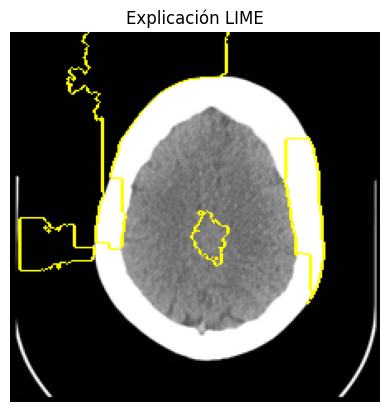

In [ ]:
# 1. Importar herramientas mágicas para explicar imágenes
from lime import lime_image  # (1) Llama a LIME, una lupa mágica que ayuda a entender cómo piensa el robot.
from skimage.segmentation import mark_boundaries  # (2) Trae una herramienta para dibujar líneas de colores alrededor de las zonas importantes.
import matplotlib.pyplot as plt  # (3) Trae los crayones mágicos para dibujar.

# 2. Crear el explicador LIME
explainer = lime_image.LimeImageExplainer()  # (4) Prepara la lupa mágica LIME para analizar imágenes.

# 3. Seleccionar una imagen de prueba
img_sample = x_test_s[0]  # (5) Elige la primera imagen del examen, ya lista para el robot.
img_original = x_test[0]  # (6) Guarda la imagen original para mostrarla después.

# 4. Definir la función de predicción
def predict_fn(images):  # (7) Crea una función que le dice a LIME cómo preguntarle al robot por sus respuestas.
    return model.predict(images)

# 5. Pedirle a LIME que explique la imagen
explanation = explainer.explain_instance(
    img_sample.astype('double'),  # (8) LIME necesita la imagen en formato especial.
    predict_fn,                   # (9) Le pasa la función para que el robot dé sus respuestas.
    top_labels=1,                 # (10) Solo queremos explicar la clase más importante.
    hide_color=0,                 # (11) Las partes ocultas se ven negras.
    num_samples=1000              # (12) LIME prueba mil veces cambiando partes de la imagen para ver qué es importante.
)

# 6. Obtener la imagen y la máscara de las zonas importantes
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],  # (13) Elige la clase principal.
    positive_only=True,         # (14) Solo muestra las zonas que ayudan a decidir.
    num_features=5,             # (15) Muestra las 5 zonas más importantes.
    hide_rest=False             # (16) No esconde el resto de la imagen.
)

# 7. Dibujar la explicación sobre la imagen original
plt.imshow(mark_boundaries(img_original / 255.0, mask))  # (17) Dibuja la imagen original y marca con colores las zonas importantes.
plt.title('Explicación LIME')  # (18) Le pone un título bonito.
plt.axis('off')  # (19) Quita los bordes para que se vea mejor.
plt.show()  # (20) Muestra el dibujo final para que todos vean cómo pensó el robot.

"""
Explicación para niños, línea a línea:
Importar herramientas mágicas:
El robot trae LIME, una lupa mágica que ayuda a ver qué partes de la imagen usó para decidir, y crayones para dibujar.

Crear el explicador LIME:
Prepara la lupa mágica para analizar imágenes.

Seleccionar una imagen de prueba:
Elige una imagen del examen y la guarda para mostrarla después.

Definir la función de predicción:
Crea una forma para que LIME le pregunte al robot qué piensa de cada imagen.

Pedirle a LIME que explique la imagen:
LIME prueba mil veces tapando partes de la imagen para ver cuáles son importantes para el robot.

Obtener la imagen y la máscara de las zonas importantes:
LIME marca las 5 zonas más importantes que ayudaron al robot a decidir.

Dibujar la explicación sobre la imagen original:
El robot muestra la imagen y dibuja líneas de colores alrededor de las partes que miró más. Así, todos pueden ver cómo piensa el robot y por qué tomó su decisión.

Ejemplo para niños:
Imagina que tienes una lupa mágica que te muestra con colores las partes de un dibujo que usaste para adivinar qué es. El robot hace lo mismo: te enseña la foto y te muestra con colores dónde miró más para decidir si era un cerebro sano o con problema. ¡Así puedes entender cómo piensa el robot!
"""

¡Vamos a leer juntos la imagen de “Explicación LIME” como si fuera un mapa del tesoro que muestra por dónde miró el robot!

---

### ¿Qué dice la imagen?

Esta es una tomografía de cerebro.  
Encima, hay líneas amarillas que marcan las zonas que el robot consideró más importantes para tomar su decisión sobre si el cerebro es normal o tiene un problema.

---

### ¿Cómo interpretarla paso a paso?

1. **Empieza por el título:**  
   Arriba dice “Explicación LIME”. Eso significa que estamos usando una lupa mágica (LIME) para ver qué partes de la imagen ayudaron al robot a decidir.

2. **Mira la imagen de fondo:**  
   Es una tomografía en blanco y negro, mostrando el cerebro.

3. **Observa las líneas amarillas:**  
   - Las líneas amarillas rodean las zonas que el robot “miró” más para decidir.
   - Esas zonas son como pistas importantes para el robot.

---

### ¿Qué es cada color?

- **Blanco y negro:**  
  Es la imagen original de la tomografía.
- **Líneas amarillas:**  
  Marcan las áreas que el robot usó para tomar su decisión.  
  ¡Son las zonas más importantes!

---

### ¿Por dónde empezar a ver?

Empieza mirando el centro del cerebro y sigue las líneas amarillas.  
Fíjate si las líneas están sobre partes del cerebro o fuera de él.

---

### ¿Cuál es el color más importante?

**El amarillo** es el más importante, porque muestra las zonas que el robot usó para decidir.  
¡Queremos que el amarillo esté sobre el cerebro, no fuera!

---

### ¿Qué conclusiones sacar?

- Si las líneas amarillas están sobre el cerebro, el robot está mirando donde debe.
- Si las líneas amarillas están fuera del cerebro, el robot podría estar confundido y necesita mejorar.

---

### ¿Cómo sacar las conclusiones y cuándo?

- **Después de ver el mapa:**  
  Si el amarillo está en el cerebro, puedes confiar más en la decisión del robot.
- **Si el amarillo está fuera:**  
  El robot podría estar usando pistas equivocadas y hay que enseñarle mejor.

---

### ¿Cómo mejorar?

- Dale más ejemplos para practicar, especialmente de los casos donde se equivoca.
- Ajusta el modelo para que aprenda a mirar solo el cerebro.
- Usa más explicaciones LIME para revisar cómo piensa el robot en diferentes imágenes.

---

**En resumen:**  
Esta imagen te ayuda a ver si el robot está mirando las partes correctas del cerebro para tomar buenas decisiones.  
¡Así puedes confiar en él o ayudarlo a mejorar!

# 15. Interpretabilidad: Sensibilidad a oclusión

1/1 [==============================] - 0s 34ms/step


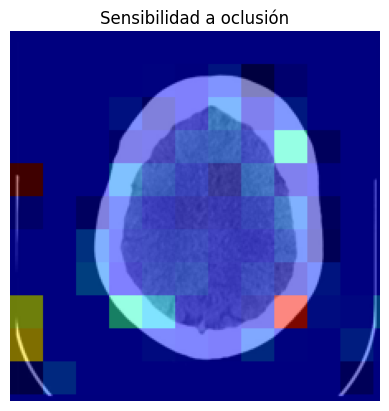

In [22]:
def occlusion_sensitivity(model, image, patch_size=20):
    img = image.copy()
    heatmap = np.zeros((img.shape[0], img.shape[1]))
    for i in range(0, img.shape[0], patch_size):
        for j in range(0, img.shape[1], patch_size):
            occluded = img.copy()
            occluded[i:i+patch_size, j:j+patch_size, :] = 0
            pred = model.predict(occluded[np.newaxis, ...])[0][0]
            heatmap[i:i+patch_size, j:j+patch_size] = pred
    return heatmap

# Usa una imagen de tu set de test normalizado
img_sample = x_test_s[0]  # Selecciona la primera imagen de test
heatmap = occlusion_sensitivity(model, img_sample)

plt.imshow(x_test[0])  # Muestra la imagen original (sin normalizar)
plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.title('Sensibilidad a oclusión')
plt.axis('off')
plt.show()

# 16. Guardar y cargar el modelo

In [23]:
# Guardar modelo
model.save('modelo_cnn_stroke.h5')

# Cargar modelo
from tensorflow.keras.models import load_model
modelo_cargado = load_model('modelo_cnn_stroke.h5')

c:\Users\admin\Desktop\MACHINE LEARNING\Proyecto_9\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 17. contenido de archivoh.h5

In [25]:
from tensorflow.keras.models import load_model

# Cargar el modelo
modelo = load_model('modelo_cnn_stroke.h5')

# Mostrar el resumen de la arquitectura (capas, formas, parámetros)
modelo.summary()

# Mostrar la configuración completa del modelo (en formato dict)
print(modelo.get_config())

# Opcional: ver los nombres y tipos de cada capa
for i, layer in enumerate(modelo.layers):
    print(f"Capa {i}: {layer.name} - {layer.__class__.__name__}")

# Si quieres ver los pesos de cada capa:
for i, layer in enumerate(modelo.layers):
    print(f"Pesos de la capa {i} ({layer.name}):")
    print(layer.get_weights())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 100)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 80)      72080     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 80)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        46144     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0